In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 7.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

100% 6.23M/6.23M [00:00<00:00, 99.0MB/s]
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 75.1MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 135.7ms
Speed: 15.0ms preprocess, 135.7ms inference, 795.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [9]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)



Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 123.9ms
Speed: 4.1ms preprocess, 123.9ms inference, 673.3ms postprocess per image at shape (1, 3, 640, 384)


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
%cd /content/drive/MyDrive/yolov8

/content/drive/MyDrive/yolov8


In [16]:
# %cd /content/drive/MyDrive/My Courses/YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

In [17]:
!ls runs/detect/train/

args.yaml  weights


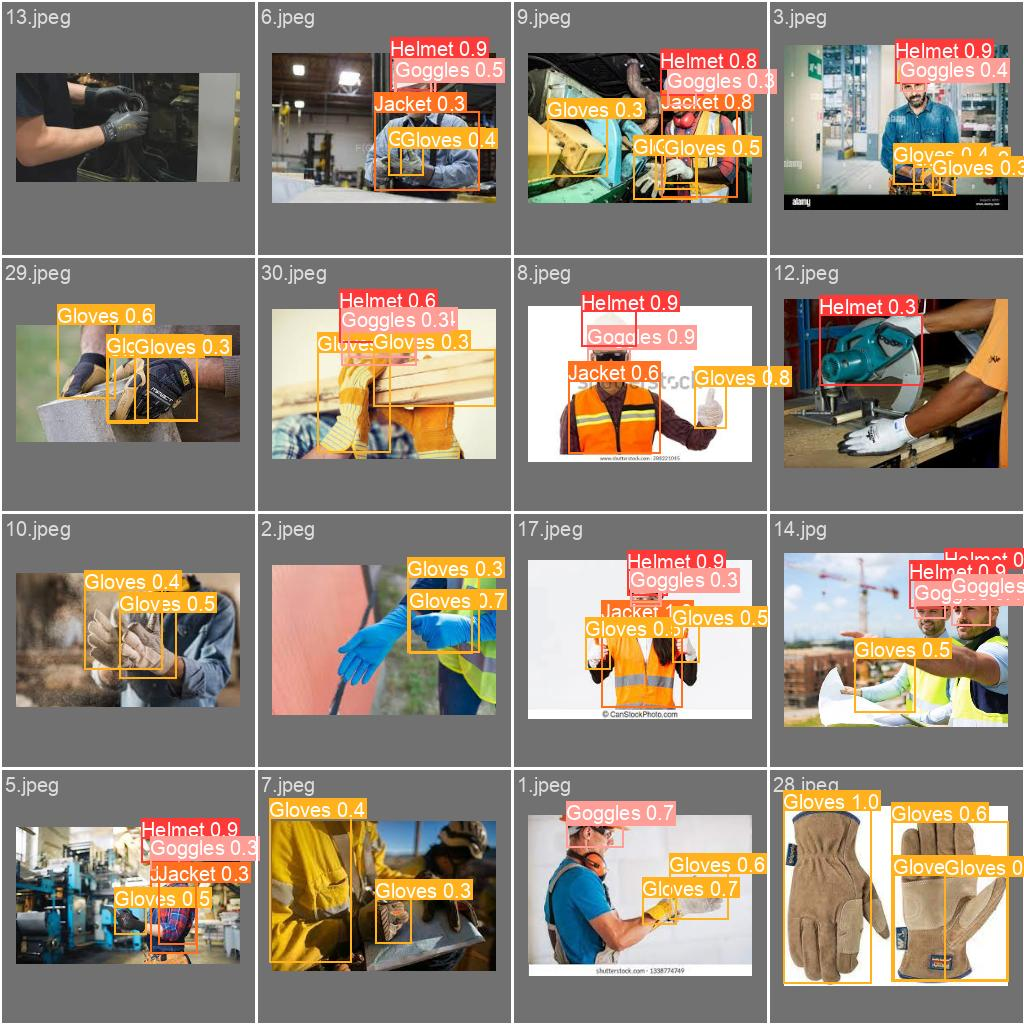

In [20]:
Image(filename='runs/detect/train3/val_batch0_pred.jpg', width=600)

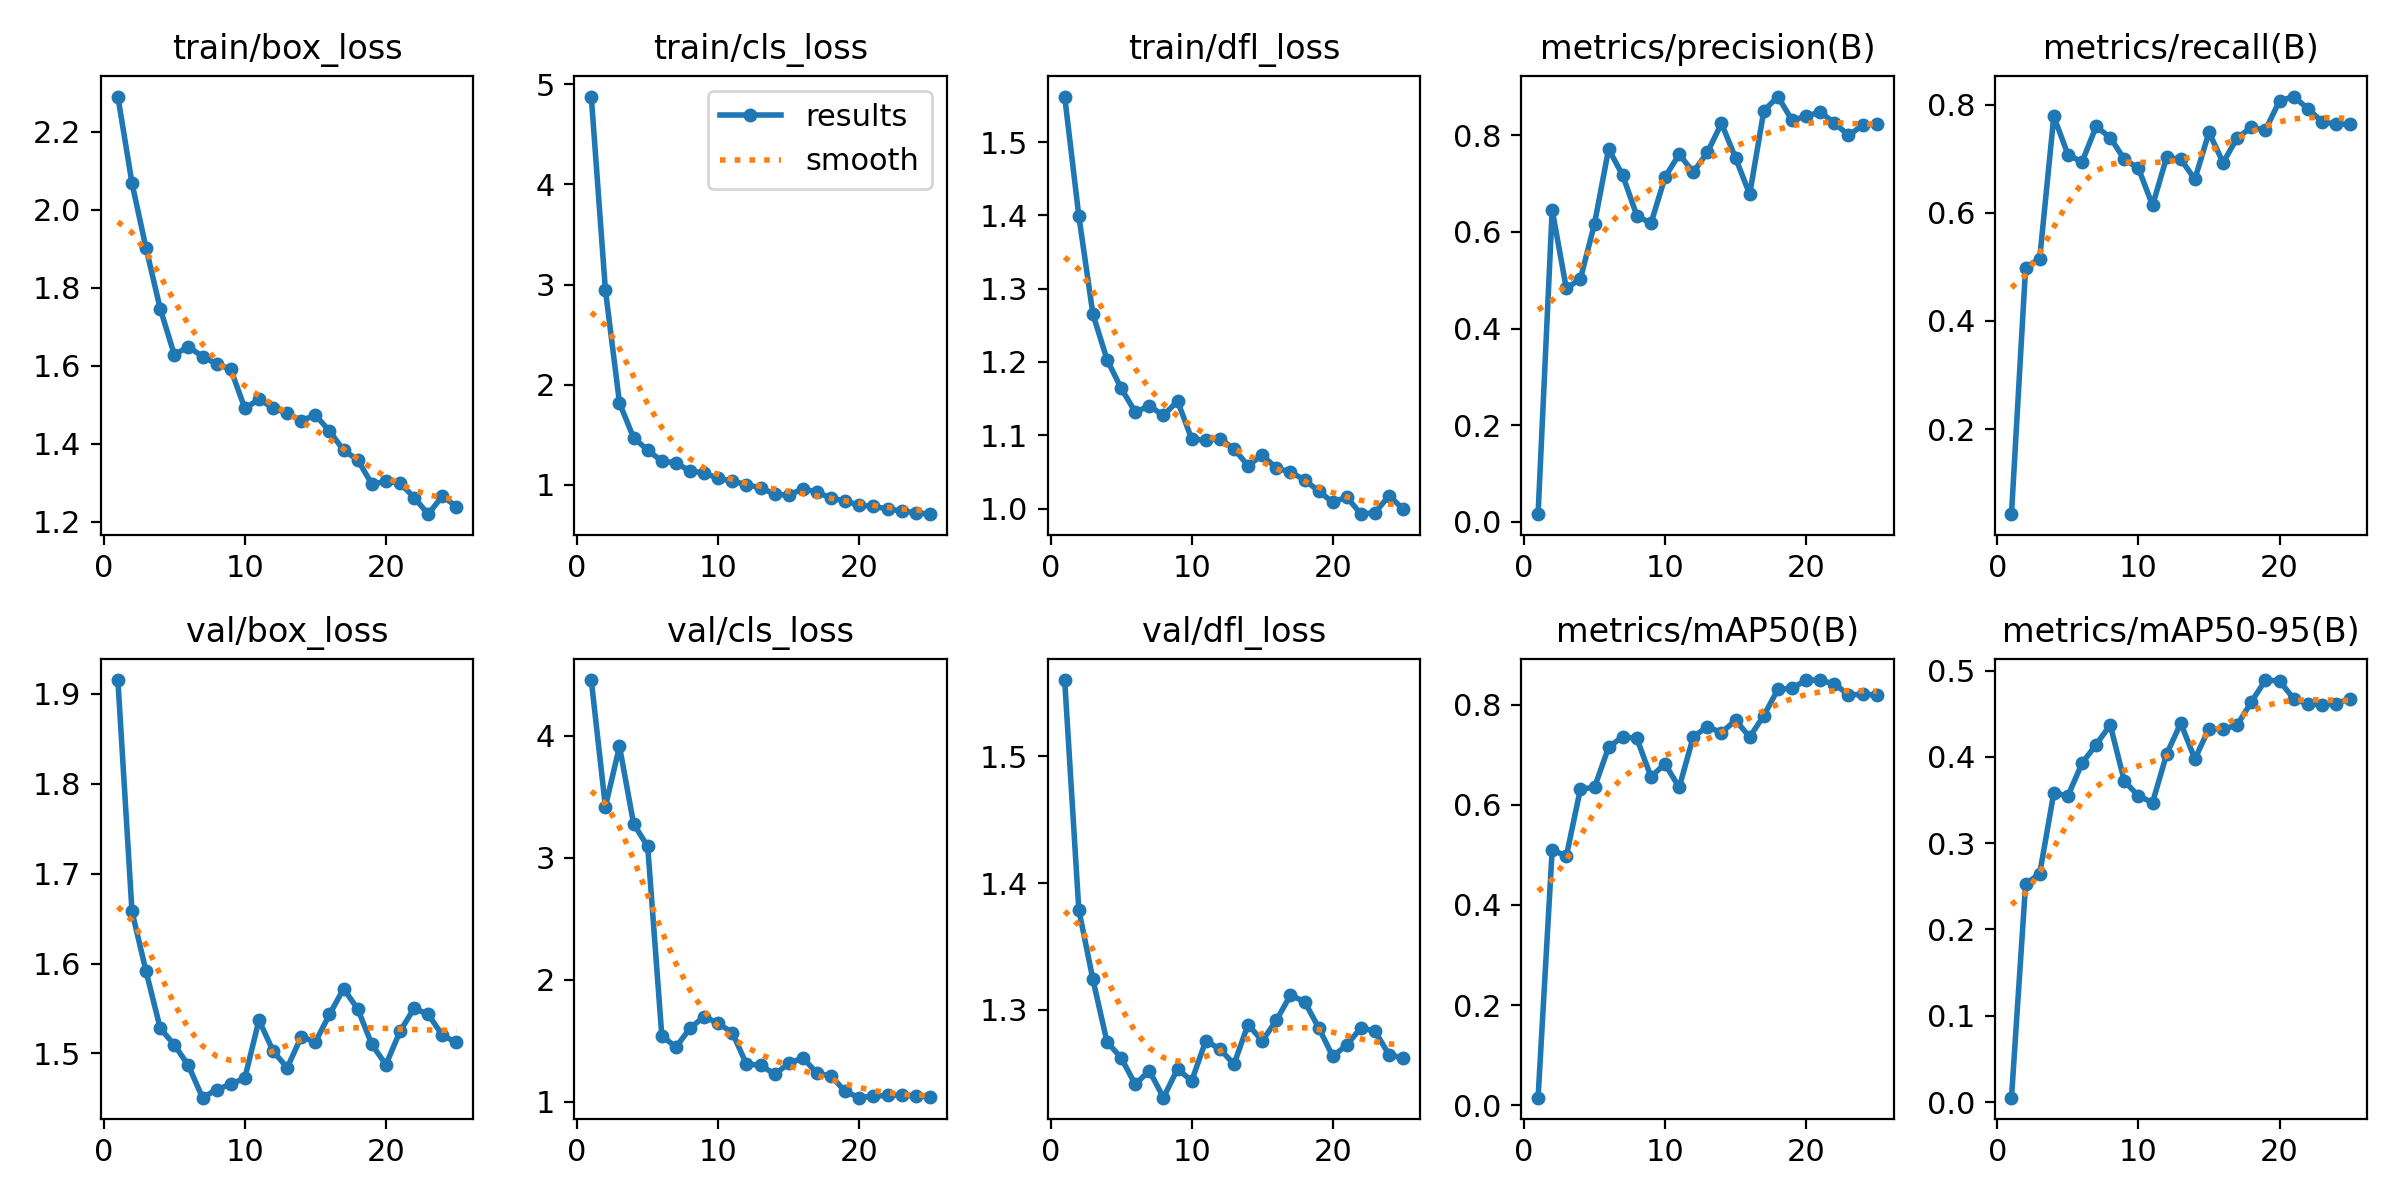

In [21]:
Image(filename='runs/detect/train3/results.png', width=600)

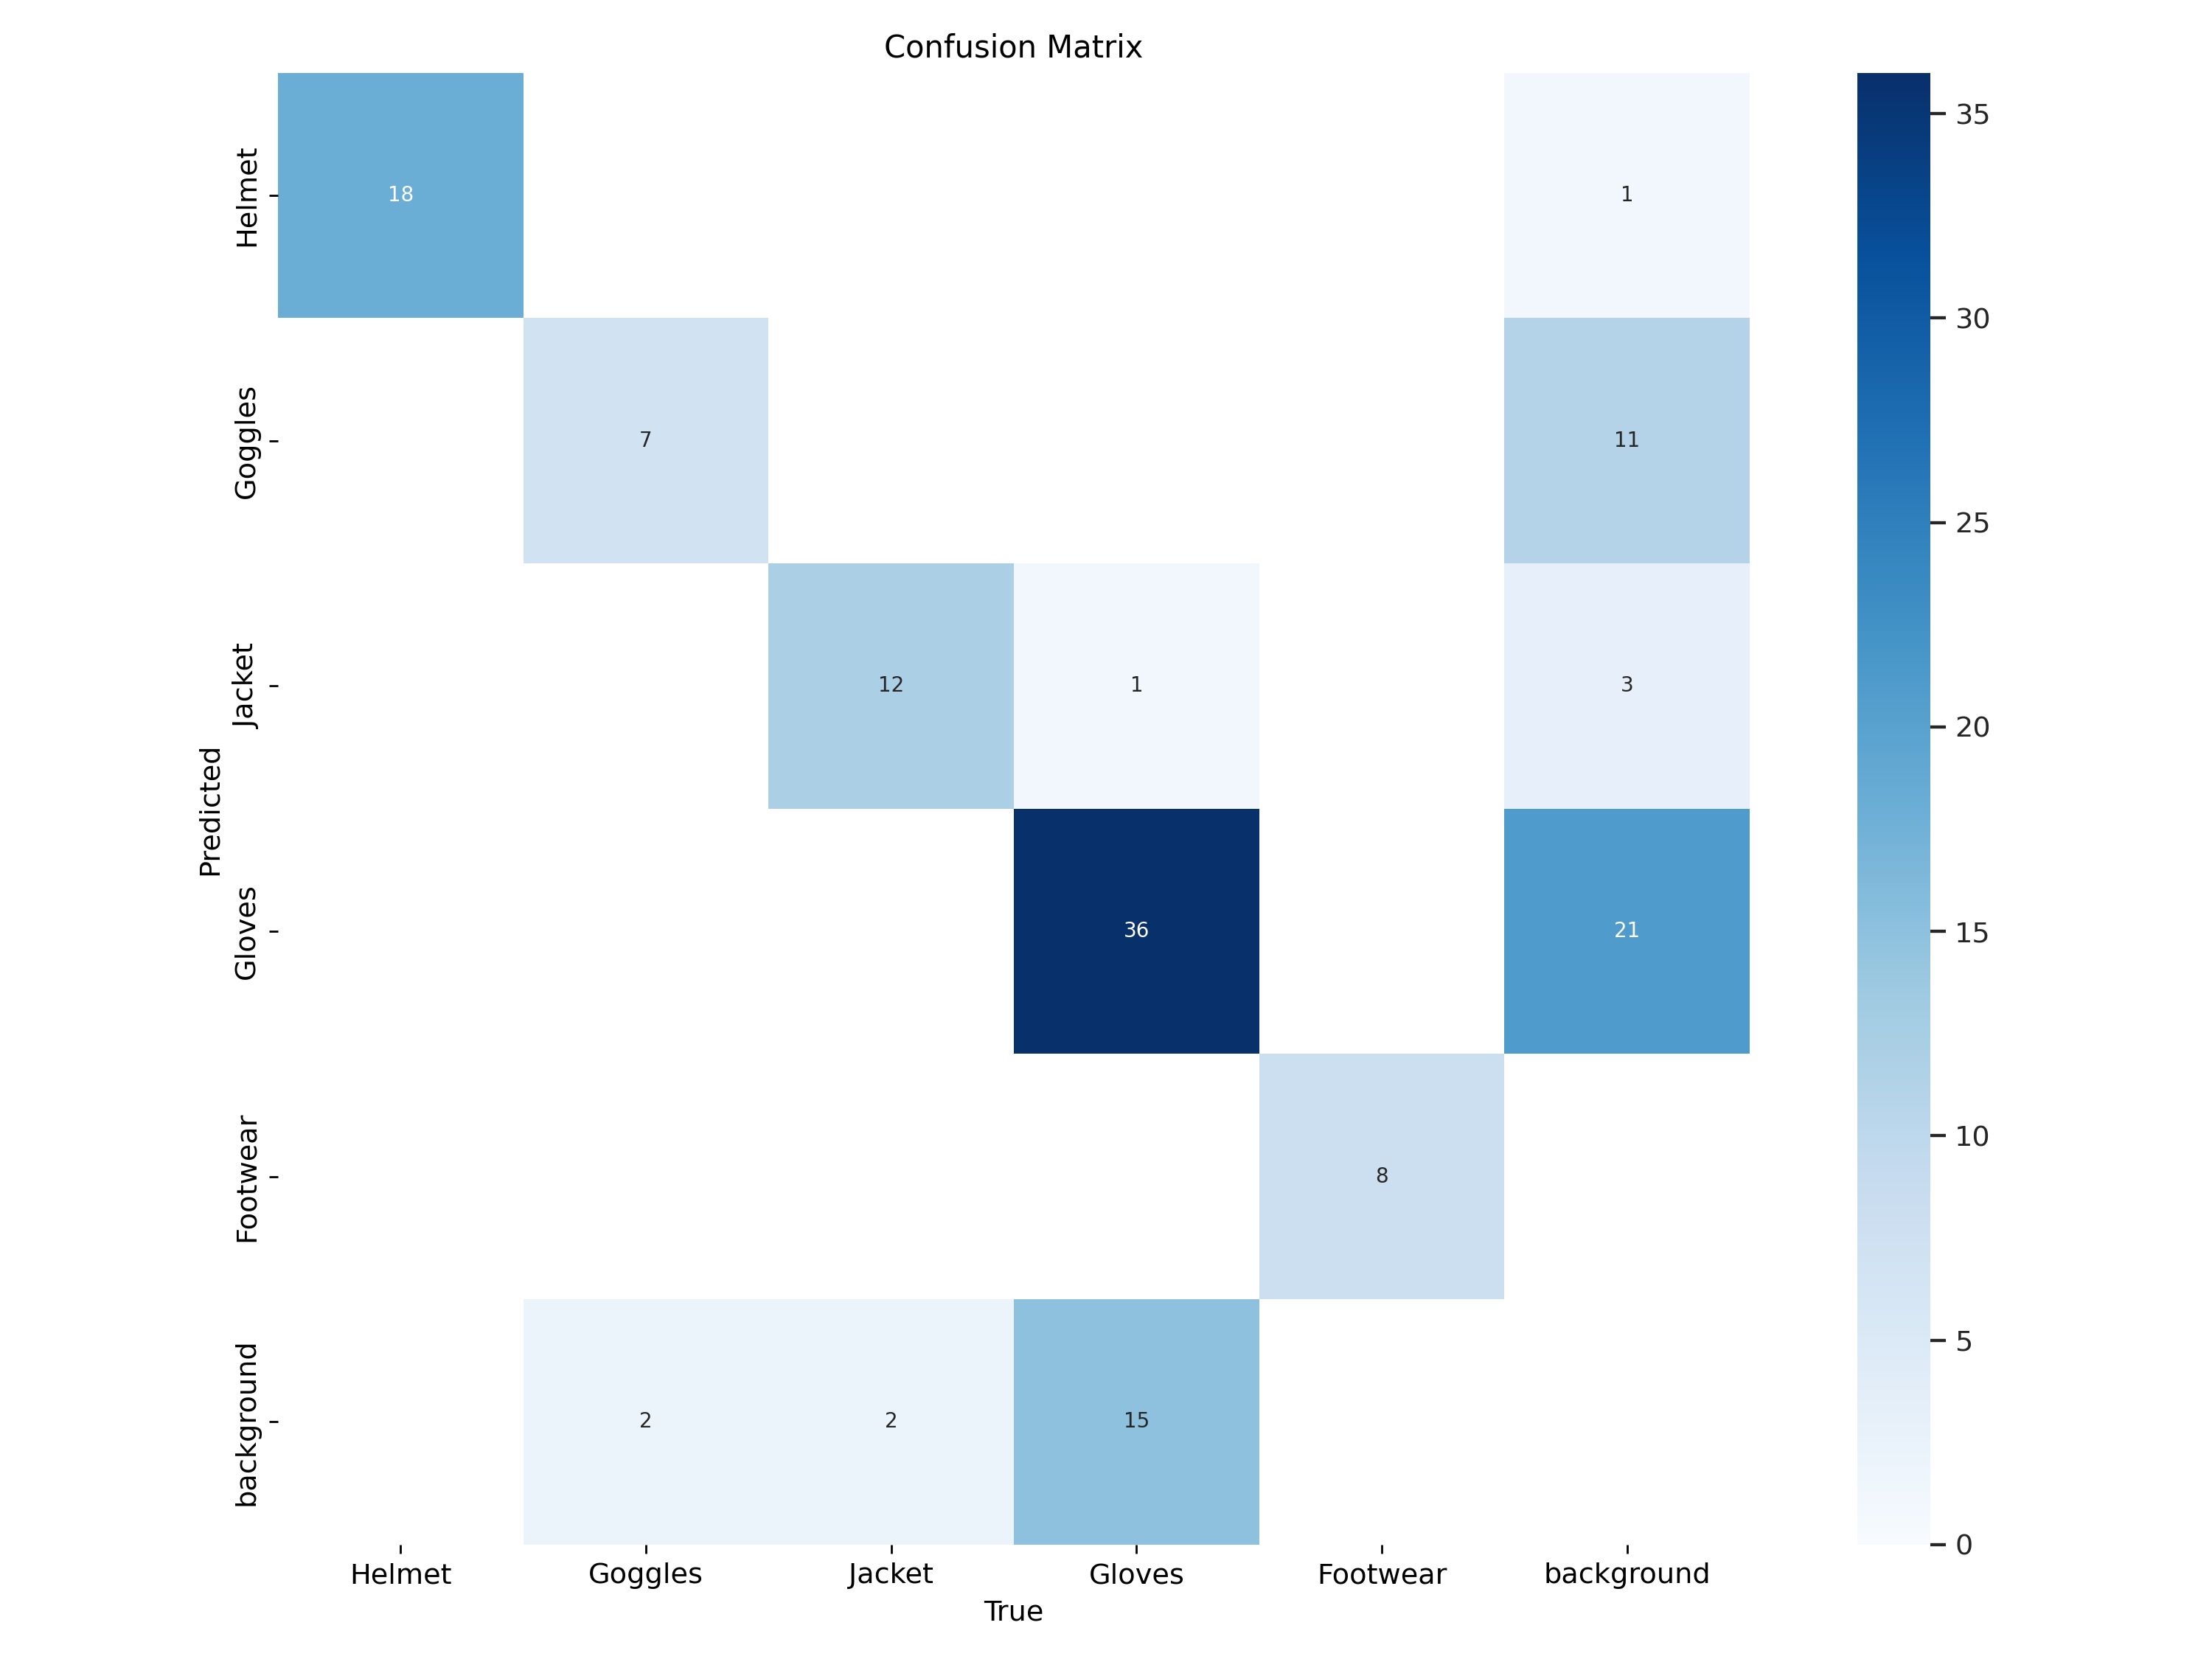

In [22]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

In [25]:
#validating model
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.20s/it]
                   all         31        101      0.847      0.798      0.846       0.49
                Helmet         17         18      0.897          1      0.992      0.689
               Goggles          9          9      0.705      0.667      0.708      0.283
                Jacket         13         14      0.856      0.857      0.852      0.613
                Gloves         30         52      0.777      0.536      0.681      0.372
              Footwear          4          8          1       0.93      0.995      0.491
Speed: 0.1ms preprocess, 45.0ms infere

In [26]:
#inference with new model
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/yolov8/data/test/images/1.jpeg: 192x224 1 Goggles, 2 Glovess, 139.0ms
image 2/31 /content/drive/MyDrive/yolov8/data/test/images/10.jpeg: 160x224 2 Glovess, 140.4ms
image 3/31 /content/drive/MyDrive/yolov8/data/test/images/11.jpeg: 224x224 4 Glovess, 11.0ms
image 4/31 /content/drive/MyDrive/yolov8/data/test/images/12.jpeg: 192x224 (no detections), 14.1ms
image 5/31 /content/drive/MyDrive/yolov8/data/test/images/13.jpeg: 128x224 (no detections), 157.9ms
image 6/31 /content/drive/MyDrive/yolov8/data/test/images/14(1).jpeg: 224x224 1 Jacket, 13.3ms
image 7/31 /content/drive/MyDrive/yolov8/data/test/images/14.jpg: 192x224 2 Helmets, 2 Goggless, 1 Gloves, 8.7ms
image 8/31 /content/drive/MyDrive/yolov8/data/test/images/15.jpeg: 224x224 3 Glovess, 9.6ms
image 9/31 /content/drive/MyDrive/yolov8/